In [1]:
# Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2 as cv
import os
from sklearn.model_selection import train_test_split

In [2]:
# Load Train CSV

TRAIN_CSV_PATH = './dataset/train.csv'

df_train = pd.read_csv(TRAIN_CSV_PATH)

df_train.head()

,id,jenis,warna
0,1,1,1
1,2,0,2
2,3,1,3
3,4,1,1
4,5,0,4


In [3]:
# Load Train Images

X_raw = []
Y_shape = []
Y_color = []

TRAIN_IMG_PATH = './dataset/train/'

target_size = (224, 224)


for idx, file in enumerate(os.listdir(TRAIN_IMG_PATH)):
    
    file_path = os.path.join(TRAIN_IMG_PATH, file)
    
    # Load data in RGB format for color classification
    image = tf.keras.preprocessing.image.load_img(file_path, color_mode='rgb', target_size=target_size)
    image = tf.keras.preprocessing.image.img_to_array(image)
    
    # Get file name
    file_id = os.path.splitext(file)[0]
    
    # Extract matching row, where id == name from train.csv
    matching_row = df_train[df_train['id'] == int(file_id)]
    
    if not matching_row.empty:
        X_raw.append(image)
        Y_shape.append(matching_row['jenis'].values[0])
        Y_color.append(matching_row['warna'].values[0])
    else:
        print(f"No matching row found for file {file}")
    
    
# Convert to numpy array for easier manipulation
X_raw = np.array(X_raw)
Y_shape = np.array(Y_shape)
Y_color = np.array(Y_color)
 
print(X_raw[100], Y_shape[100], Y_color[100])

[[[248. 248. 248.]
  [248. 248. 248.]
  [248. 248. 248.]
  ...
  [248. 248. 248.]
  [248. 248. 248.]
  [248. 248. 248.]]

 [[248. 248. 248.]
  [248. 248. 248.]
  [248. 248. 248.]
  ...
  [248. 248. 248.]
  [248. 248. 248.]
  [248. 248. 248.]]

 [[248. 248. 248.]
  [248. 248. 248.]
  [248. 248. 248.]
  ...
  [248. 248. 248.]
  [248. 248. 248.]
  [248. 248. 248.]]

 ...

 [[248. 248. 248.]
  [248. 248. 248.]
  [248. 248. 248.]
  ...
  [245. 245. 245.]
  [253. 253. 253.]
  [251. 249. 250.]]

 [[248. 248. 248.]
  [248. 248. 248.]
  [248. 248. 248.]
  ...
  [248. 248. 248.]
  [243. 243. 243.]
  [253. 251. 252.]]

 [[248. 248. 248.]
  [248. 248. 248.]
  [248. 248. 248.]
  ...
  [250. 250. 250.]
  [255. 254. 255.]
  [244. 242. 243.]]] 0 2


Preprocessing

In [4]:
# Check X, Y shape

print(f'X shape: {X_raw.shape}')
print(f'Y_shape shape: {Y_shape.shape}')
print(f'Y_color shape: {Y_color.shape}\n')

# Check Y classes

shape_classes = np.unique(Y_shape)
color_classes = np.unique(Y_color)

print(f'Shape classes: {shape_classes}')
print(f'Color classes: {color_classes}')

X shape: (777, 224, 224, 3)
Y_shape shape: (777,)
Y_color shape: (777,)

Shape classes: [0 1]
Color classes: [0 1 2 3 4]


In [5]:
# Normalize X by pixel value

X_normalized = X_raw / 255

print(X_normalized[100])

[[[0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]
  ...
  [0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]]

 [[0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]
  ...
  [0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]]

 [[0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]
  ...
  [0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]]

 ...

 [[0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]
  ...
  [0.9607843  0.9607843  0.9607843 ]
  [0.99215686 0.99215686 0.99215686]
  [0.9843137  0.9764706  0.98039216]]

 [[0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]


In [6]:
# Dictionary for label (based on kaggle's data)

index_to_shape_dict = {0 : 'Kaos', 1 : 'Hoodie'}
index_to_color_dict = {0: 'Merah', 1: 'Kuning', 2: 'Biru', 3: 'Hitam', 4: 'Putih'}

In [7]:
# Apply One hot encoding for Y_color (multi-class / more than 2)

def one_hot_encoding(Y: np.array, num_classes: int) -> np.array:
    
    encoded = tf.keras.utils.to_categorical(Y, num_classes= num_classes)
    
    return encoded

shape_num_classes = shape_classes.shape[0]
color_num_classes = color_classes.shape[0]

Y_color_encoded = one_hot_encoding(Y_color, color_num_classes)

print(Y_color_encoded.shape)

(777, 5)


In [8]:
# Train Validation Split (80:20)

X_train, X_val, Y_shape_train, Y_shape_val, Y_color_train, Y_color_val = train_test_split(
    X_normalized, Y_shape, Y_color_encoded, test_size=0.2, random_state=42)

# Print the shapes of the training and validation datasets
print(f'X_train shape: {X_train.shape} | val: {X_val.shape}')
print(f'Y_shape_train shape: {Y_shape_train.shape} | val: {Y_shape_val.shape}')
print(f'Y_color_train shape: {Y_color_train.shape} | val: {Y_color_val.shape}\n')

X_train shape: (621, 224, 224, 3) | val: (156, 224, 224, 3)
Y_shape_train shape: (621,) | val: (156,)
Y_color_train shape: (621, 5) | val: (156, 5)



In [9]:
# Define input shape

input_shape = X_train.shape[1:]

print(f'Input shape: {input_shape}')

Input shape: (224, 224, 3)


In [10]:
# Define Exact Match Ratio metrics

def exact_match_ratio(y_true, y_pred):
    
    y_pred = tf.round(tf.nn.sigmoid(y_pred))
    ratio = tf.reduce_mean(tf.cast(tf.equal(y_true, y_pred), tf.float32))
    
    return ratio

In [11]:
# Model 

# (Strided CNN)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_shape),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
])

# CNN
# model = tf.keras.Sequential([
#     tf.keras.layers.Input(shape=input_shape),
#     tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
#     tf.keras.layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
#     tf.keras.layers.Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),    
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dropout(0.1),
# ])


features = model.output
shape_output = tf.keras.layers.Dense(1, activation='linear', name='shape_output')(features)
color_output = tf.keras.layers.Dense(color_num_classes, activation='linear', name='color_output')(features)

model = tf.keras.Model(inputs=model.input, outputs=[shape_output, color_output])

print(model.summary())

lr = 0.0001
epochs = 30

# Use logits for more accurate decimal calculation
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss={'shape_output': tf.keras.losses.BinaryCrossentropy(from_logits=True), 'color_output': tf.keras.losses.CategoricalCrossentropy(from_logits=True)},
              metrics=['accuracy'])

history = model.fit(X_train, {'shape_output': Y_shape_train, 'color_output': Y_color_train}, 
                    validation_data=(X_val, {'shape_output': Y_shape_val, 'color_output': Y_color_val}),
                    epochs=epochs)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 56, 56, 64)   18496       ['conv2d[0][0]']                 
                                                                                              

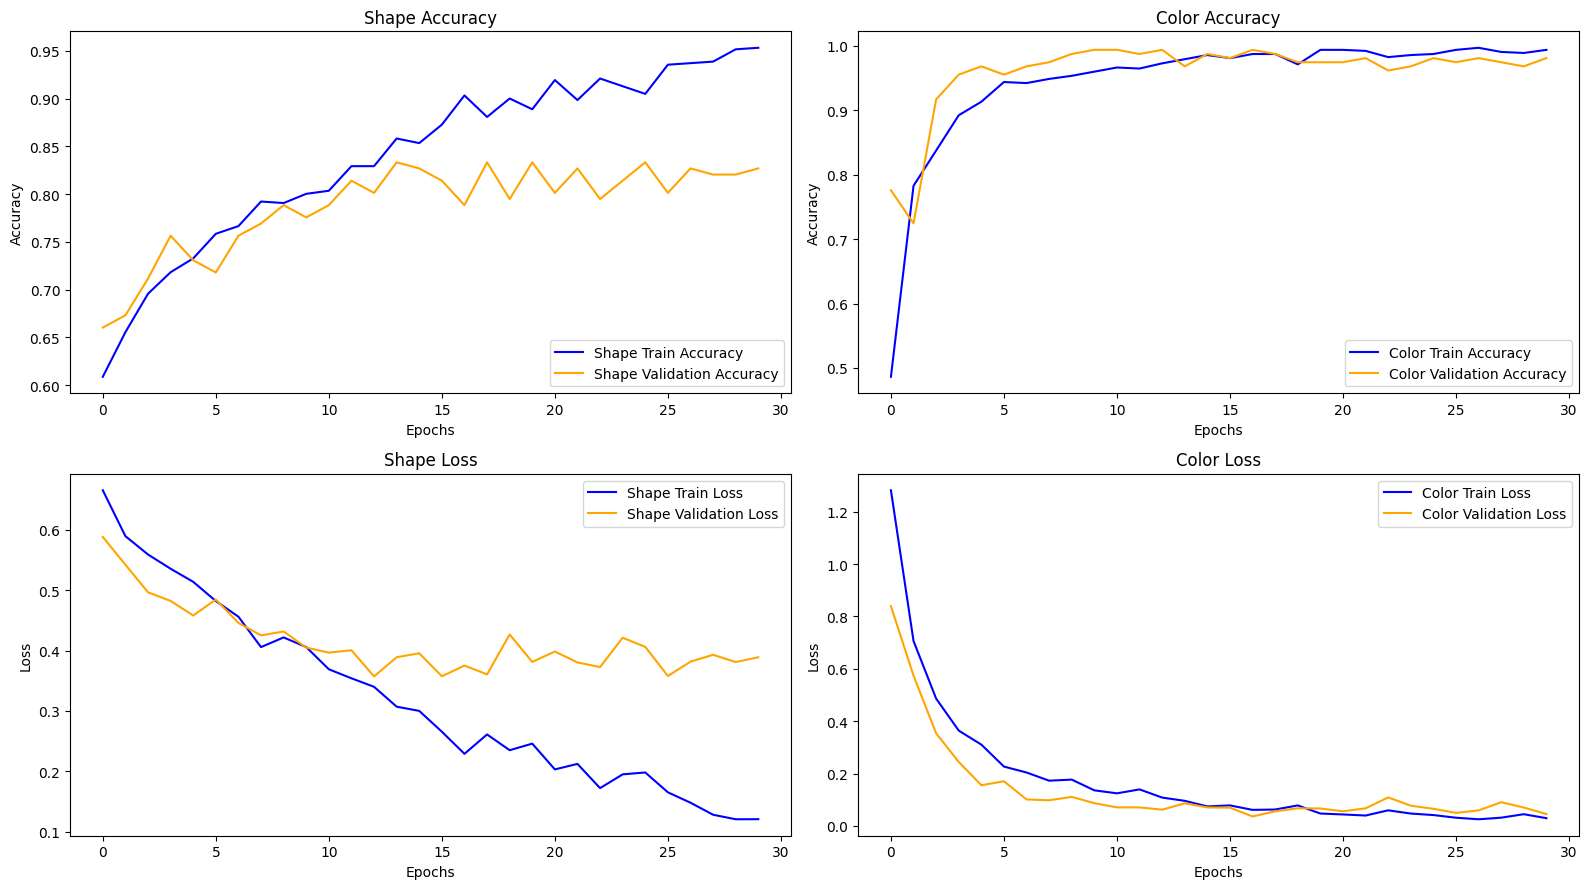

In [12]:
# Plot Accuracy and Loss Graph

# Accuracy
plt.figure(figsize=(16, 9))

plt.subplot(2, 2, 1)
plt.plot(history.history['shape_output_accuracy'], label='Shape Train Accuracy', color='blue')
plt.plot(history.history['val_shape_output_accuracy'], label='Shape Validation Accuracy', color='orange')
plt.title('Shape Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(2, 2, 2)
plt.plot(history.history['color_output_accuracy'], label='Color Train Accuracy', color='blue')
plt.plot(history.history['val_color_output_accuracy'], label='Color Validation Accuracy', color='orange')
plt.title('Color Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss
plt.subplot(2, 2, 3)
plt.plot(history.history['shape_output_loss'], label='Shape Train Loss', color='blue')
plt.plot(history.history['val_shape_output_loss'], label='Shape Validation Loss', color='orange')
plt.title('Shape Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.subplot(2, 2, 4)
plt.plot(history.history['color_output_loss'], label='Color Train Loss', color='blue')
plt.plot(history.history['val_color_output_loss'], label='Color Validation Loss', color='orange')
plt.title('Color Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

Single Model

In [13]:
# Model 

# (Strided CNN)
single_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_shape),
    # tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
])

# CNN
# single_model = tf.keras.Sequential([
#     tf.keras.layers.Input(shape=input_shape),
#     tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
#     tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
#     tf.keras.layers.Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
#     tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
#     tf.keras.layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),    
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dropout(0.1),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])


print(model.summary())

lr = 0.0003
epochs = 10

single_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

single_history = single_model.fit(X_train, Y_shape_train, 
                    validation_data=(X_val, Y_shape_val),
                    epochs=epochs,
                    )

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 56, 56, 64)   18496       ['conv2d[0][0]']                 
                                                                                              

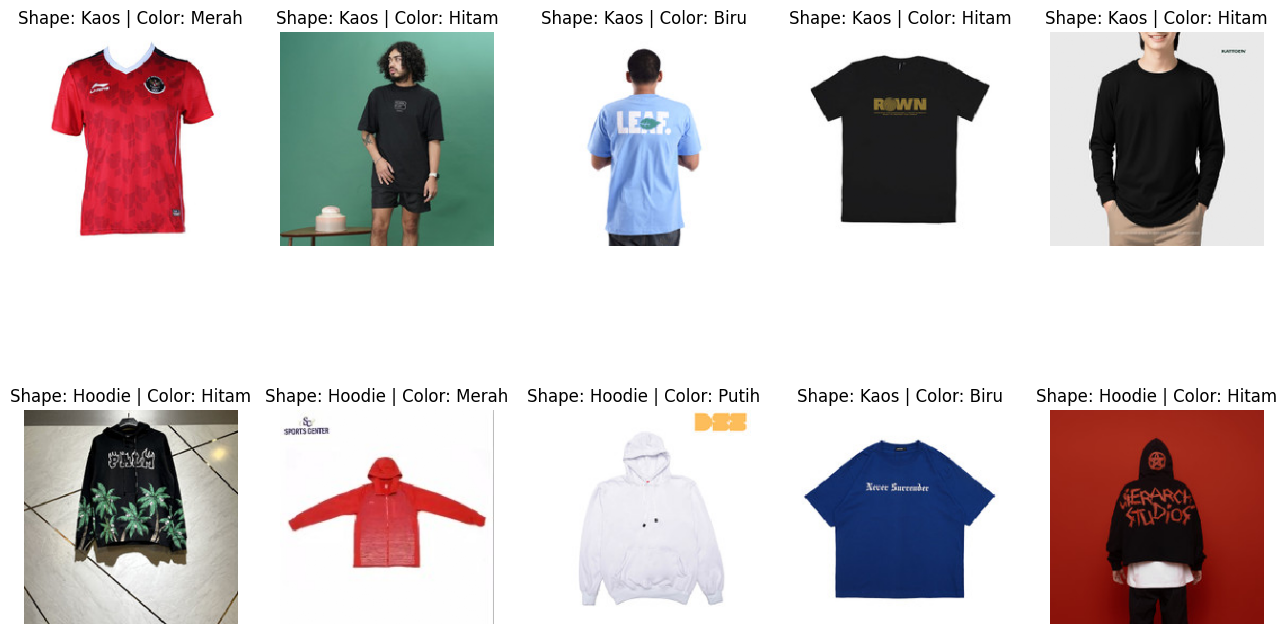

In [14]:
# Sample train data

rand_idxs = np.random.randint(0, X_normalized.shape[0], size=10)

plt.figure(figsize=(16, 9))

for i, rand_idx in enumerate(rand_idxs):
    
    plt.subplot(2, 5, i + 1)
    plt.axis('off')
    plt.imshow(X_normalized[rand_idx])
    plt.title(f'Shape: {index_to_shape_dict[Y_shape[rand_idx]]} | Color: {index_to_color_dict[Y_color[rand_idx]]}')
    
plt.show()

Text(0.5, 1.0, 'Shape: Kaos | Color: Hitam')

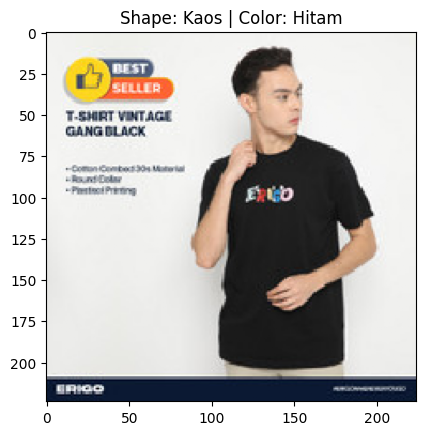

In [15]:
idx = 20

plt.imshow(X_normalized[idx])
plt.title(f'Shape: {index_to_shape_dict[Y_shape[idx]]} | Color: {index_to_color_dict[Y_color[idx]]}')